In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
from scipy import stats
import scipy as sp
import random
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import pydotplus
import matplotlib.image as mpimg
from io import StringIO
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import folium
import webbrowser
from folium import plugins
from imblearn.over_sampling import SMOTE

# I. Data wrangling which includes
1-Data gathering: Fortunately we have data set in csv file we don't we to scrape

2-Data Assessment (detecting Quality and tidiness issues)

3-Data Celaning by fixing issues appeared in assessment

In [2]:
#importing data set
df = pd.read_csv('Data-Collisions.csv')

D:\program files\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
# Exploring Data
print(df.head())
print(df.UNDERINFL.value_counts())
print(df.PEDROWNOTGRNT.value_counts())
print(df.SEGLANEKEY.value_counts())
print(df.SPEEDING.value_counts())
print(df.info())

   SEVERITYCODE           X          Y  OBJECTID  INCKEY  COLDETKEY REPORTNO  \
0             2 -122.323148  47.703140         1    1307       1307  3502005   
1             1 -122.347294  47.647172         2   52200      52200  2607959   
2             1 -122.334540  47.607871         3   26700      26700  1482393   
3             1 -122.334803  47.604803         4    1144       1144  3503937   
4             2 -122.306426  47.545739         5   17700      17700  1807429   

    STATUS      ADDRTYPE   INTKEY  ... ROADCOND                LIGHTCOND  \
0  Matched  Intersection  37475.0  ...      Wet                 Daylight   
1  Matched         Block      NaN  ...      Wet  Dark - Street Lights On   
2  Matched         Block      NaN  ...      Dry                 Daylight   
3  Matched         Block      NaN  ...      Dry                 Daylight   
4  Matched  Intersection  34387.0  ...      Wet                 Daylight   

  PEDROWNOTGRNT  SDOTCOLNUM SPEEDING ST_COLCODE  \
0          

## Data assessment 

* Drop columns EXCEPTRSNCODE, EXCEPTRSNDESC,  REPORTNO, STATUS, INCDATE, PEDROWNOTGRNT,  SEGLANEKEY, CROSSWALKKEY, duplicate     SEVERITYCODE, INCKEY, COLDETKEY, SDOT_COLCODE, ST_COLCODE, SDOTCOLNUM, OBJECTID    (Tidiness)


* Encoding UNDERINFL to be Y/N or 0,1 (Quality)


* Encoding in attention (0 = No, 1 = Yes)


* Encoding Under the influence (0 = No, 1 = Yes)


* Encoding Speeding(0 = No, 1 = Yes)


* Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)


* Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
  Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)


* Change type of INCDTTM to datetime (Quality)


* Rename Columns to proper names (Quality)

## Data Cleaning
* include data cleansing and preprocessing for machine learning

In [4]:
df_clean = df.copy()

In [5]:
#  Drop column which is unnecessary

drop_cols = ['EXCEPTRSNCODE','EXCEPTRSNDESC','REPORTNO','STATUS','INCDATE','PEDROWNOTGRNT',
             'SEGLANEKEY','CROSSWALKKEY','SEVERITYCODE.1','COLDETKEY','SDOT_COLCODE','ST_COLCODE',
            'SDOTCOLNUM','OBJECTID']
df_clean.drop(drop_cols, axis = 1, inplace = True)    

In [6]:

# converting severity code from(1,2) to (0,1)
severity_code = df_clean['SEVERITYCODE'].values
label = preprocessing.LabelEncoder()
label.fit([1,2])
severity_code = label.transform(severity_code)
df_clean['SEVERITYCODE'] = severity_code

In [7]:
# - Change type of INCDTTM to datetime (Quality)
#df_clean['INCDTTM'] = pd.to_datetime(df_clean['INCDTTM'])

In [8]:
#Encoding in attention (0 = No, 1 = Yes)
df_clean["INATTENTIONIND"].replace("Y", 1, inplace=True)
df_clean["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#Encoding Under the influence (0 = No, 1 = Yes)
df_clean["UNDERINFL"].replace("N", 0, inplace=True)
df_clean["UNDERINFL"].replace("Y", 1, inplace=True)

#Encoding Speeding(0 = No, 1 = Yes)
df_clean["SPEEDING"].replace("Y", 1, inplace=True)
df_clean["SPEEDING"].replace(np.nan, 0, inplace=True)

#Encoding Light Conditions(0 = Light, 1 = Medium, 2 = Dark)
df_clean["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df_clean["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df_clean["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df_clean["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df_clean["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df_clean["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df_clean["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df_clean["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#Encoding Weather Conditions(0 = Clear, 1 = Overcast and Cloudy, 2 = Windy, 3 = Rain and Snow
df_clean["WEATHER"].replace("Clear", 0, inplace=True)
df_clean["WEATHER"].replace("Raining", 3, inplace=True)
df_clean["WEATHER"].replace("Overcast", 1, inplace=True)
df_clean["WEATHER"].replace("Other", "Unknown", inplace=True)
df_clean["WEATHER"].replace("Snowing", 3, inplace=True)
df_clean["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df_clean["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df_clean["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df_clean["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df_clean["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#Encoding Road Conditions(0 = Dry, 1 = Mushy, 2 = Wet)
df_clean["ROADCOND"].replace("Dry", 0, inplace=True)
df_clean["ROADCOND"].replace("Wet", 2, inplace=True)
df_clean["ROADCOND"].replace("Ice", 2, inplace=True)
df_clean["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df_clean["ROADCOND"].replace("Other", "Unknown", inplace=True)
df_clean["ROADCOND"].replace("Standing Water", 2, inplace=True)
df_clean["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df_clean["ROADCOND"].replace("Oil", 2, inplace=True)

#Making new dataframe with only variables and unique keys
selected_columns=df_clean[["X","Y","INCKEY","INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
feature_df=selected_columns.copy()
feature_df.dropna(axis=0,how='any',inplace=True)
feature_stats=feature_df.describe()

np.count_nonzero(feature_df['UNDERINFL'])

#Light Condition
lightcondsize = feature_df ["LIGHTCOND"].size

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

#Road Condition
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

#Weather Condition
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

 #Converting remaining to int
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)


# II.Data analysis

In [9]:
# Descriptive statistics
df.describe(include = "all")

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


In [10]:
descriptive_stats = df.describe(include = "all")

In [11]:
descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

D:\program files\anaconda\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


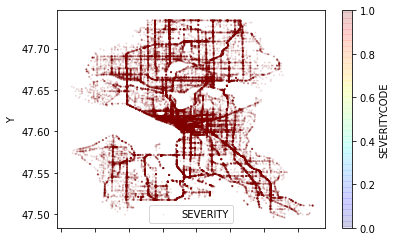

In [12]:
# Visualization Geographical Data
df_clean.plot(kind = 'scatter', x = 'X', y = 'Y', alpha = 0.1, s=df_clean["SEVERITYCODE"], label="SEVERITY",
              c="SEVERITYCODE", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [13]:
# looking for correlations
corr_matrix = df_clean.corr()
corr_matrix['SEVERITYCODE'].sort_values(ascending = False)

SEVERITYCODE      1.000000
PEDCOUNT          0.246338
PEDCYLCOUNT       0.214218
PERSONCOUNT       0.130949
INATTENTIONIND    0.046378
SPEEDING          0.038938
INCKEY            0.022065
Y                 0.017737
X                 0.010309
INTKEY            0.006553
VEHCOUNT         -0.054686
Name: SEVERITYCODE, dtype: float64

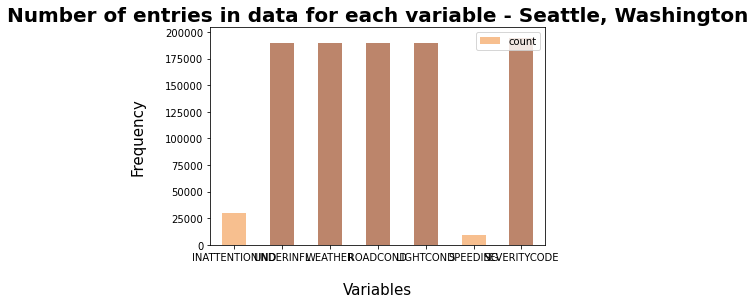

In [14]:
color_yo=['sandybrown','sienna','sienna','sienna','sienna','sandybrown','sienna']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo])
plt.title('Number of entries in data for each variable - Seattle, Washington', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

In [15]:
#Area type of each accident
explode_list = [0.05, 0.05, 0.2]
color_list=['peachpuff','lightseagreen','darkorange']
addtype=df['ADDRTYPE'].value_counts()

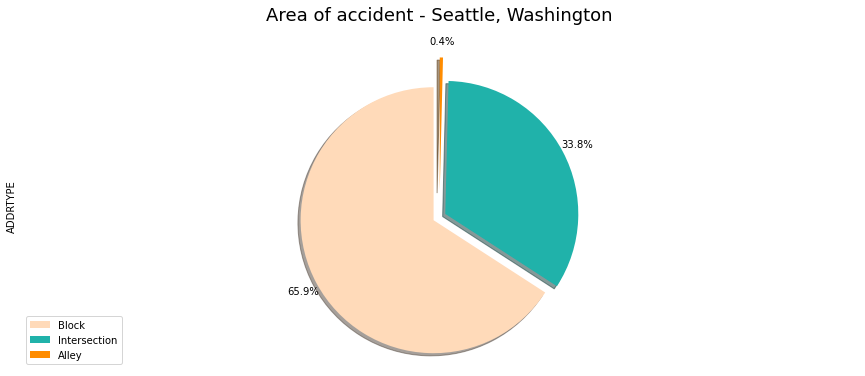

In [16]:
addtype.plot(kind='pie',
            figsize=(15, 6),
            autopct='%1.1f%%',
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.12,
            colors=color_list,
            explode=explode_list)

plt.title('Area of accident - Seattle, Washington', fontsize=18, y=1.05)
plt.axis('equal')
plt.legend(labels=addtype.index, loc='lower left')

plt.show()


0    136485
1     58188
Name: SEVERITYCODE, dtype: int64


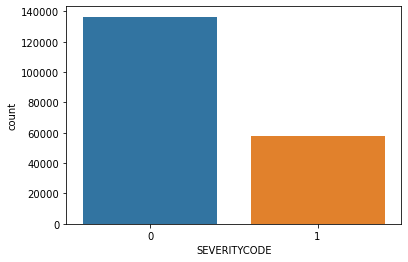

In [17]:
print(df_clean['SEVERITYCODE'].value_counts())
sns.countplot(data = df_clean, x = 'SEVERITYCODE')


0    187734
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64


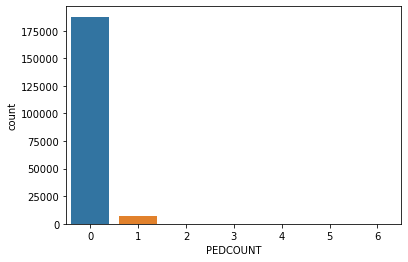

In [18]:
print(df_clean['PEDCOUNT'].value_counts())
sns.countplot(data = df_clean, x = 'PEDCOUNT')

0    100274
0     80394
1      5126
1      3995
Name: UNDERINFL, dtype: int64


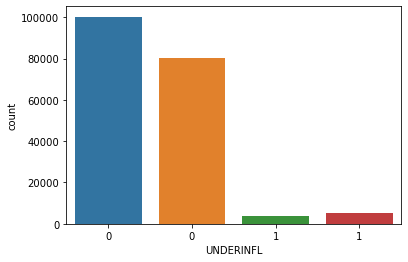

In [19]:
print(df_clean['UNDERINFL'].value_counts())
sns.countplot(data = df_clean, x = 'UNDERINFL')

0          124510
2           48862
Unknown     15210
1            1079
Name: ROADCOND, dtype: int64


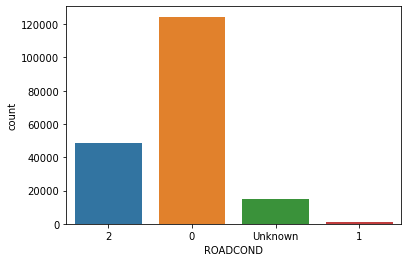

In [20]:
print(df_clean['ROADCOND'].value_counts())
sns.countplot(data = df_clean, x = 'ROADCOND')

0          116137
1           56911
Unknown     13708
2            2747
Name: LIGHTCOND, dtype: int64


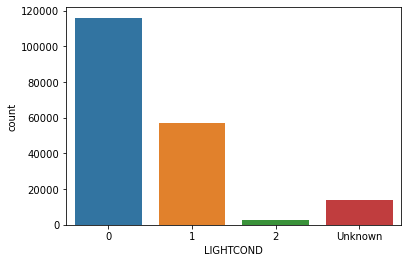

In [21]:
print(df_clean['LIGHTCOND'].value_counts())
sns.countplot(data = df_clean, x = 'LIGHTCOND')

## Insights 


* Most of accidents cause car damage rather than human injury 


* Most of accidents are vehicles crash rather than pedistrians hit


* Most of accidents happened while drivers where sober


* Most of accidents happened in a dry road 


* Most of accidents happened in a clear wheather



* Most of accidents happened in day-light

# III.Machine learning


In [22]:
#ML Feature Sets
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

In [23]:
#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


In [24]:
# Balance the Data
os = SMOTE (random_state=0)
os_data_X, os_data_y= os.fit_sample(X_train, y_train)

In [25]:
#Make reduced df from feature_df to get a few random points to make map
limit = 100005
reduced_df = feature_df.iloc [0:limit:5, 0:]

In [26]:
#Folium Map
# let's start again with a clean copy of the map of San Francisco
seattle_map = folium.Map(location=[47.61536892, -122.3302243], zoom_start=10)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(reduced_df.Y, reduced_df.X, reduced_df.SEVERITYCODE):
    folium.Marker(
    location=[lat, lng],
    icon=None,
    popup=label,
    ).add_to(incidents)

seattle_map.add_child(incidents)

# display map
seattle_map
seattle_map.save("seattlemap.html")
webbrowser.open("seattlemap.html")

True

In [27]:
#Decision Tree Clasifier
DT = DecisionTreeClassifier(criterion="entropy", max_depth=6)
DT.fit(os_data_X,os_data_y)

        #Make Prediction:
yhatDT = DT.predict(X_test)

        #Check Accuracy
print('Accuracy score for Decision Tree = ', accuracy_score(yhatDT, y_test))

        #Visualization
print('Confusion Matrix - Decision Tree')
print(pd.crosstab(y_test.ravel(), yhatDT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(yhatDT,y_test))


Accuracy score for Decision Tree =  0.5760076740692476
Confusion Matrix - Decision Tree
Predicted      0      1    All
True                          
0          24461  13984  38445
1           9442   7364  16806
All        33903  21348  55251
              precision    recall  f1-score   support

           0       0.64      0.72      0.68     33903
           1       0.44      0.34      0.39     21348

    accuracy                           0.58     55251
   macro avg       0.54      0.53      0.53     55251
weighted avg       0.56      0.58      0.56     55251



Confusion matrix, without normalization
[[ 7364  9442]
 [13984 24461]]


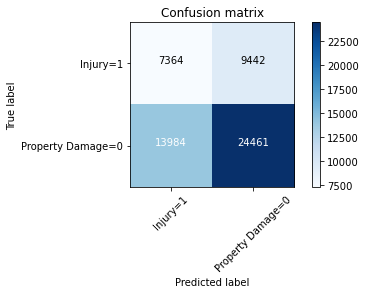

In [28]:
 #COnfusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_test, yhatDT, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [29]:
#Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(os_data_X,os_data_y)

yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

print(log_loss(y_test, yhat_prob))

print ("Accuracy", accuracy_score(yhatLR,y_test))
print (classification_report(y_test, yhatLR))

cnf_matrix = confusion_matrix(y_test, yhatLR, labels=[1,0])
np.set_printoptions(precision=2)


0.6888226756788528
Accuracy 0.5888219217751715
              precision    recall  f1-score   support

           0       0.72      0.67      0.69     38445
           1       0.35      0.41      0.38     16806

    accuracy                           0.59     55251
   macro avg       0.53      0.54      0.53     55251
weighted avg       0.61      0.59      0.60     55251



Confusion matrix, without normalization
[[ 6846  9960]
 [12758 25687]]


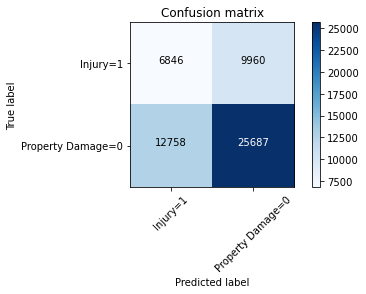

In [30]:

        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')
